In [1]:
import pandas as pd

In [3]:
resenha = pd.read_csv('/content/drive/MyDrive/data-colab/imdb-reviews-pt-br.csv')
resenha.head()

,id,text_en,text_pt,sentiment
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg


In [4]:
from sklearn.model_selection import train_test_split

In [5]:
treino, teste, classe_treino, classe_teste = train_test_split(resenha.text_pt, resenha.sentiment, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression

regressao_logistica = LogisticRegression()
regressao_logistica.fit(treino, classe_treino)
acuracia = regressao_logistica.score(teste, classe_teste)

print(acuracia)

In [7]:
print(resenha.sentiment.value_counts())

neg    24765
pos    24694
Name: sentiment, dtype: int64


In [8]:
resenha.head()

,id,text_en,text_pt,sentiment
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg


In [9]:
classificacao = resenha['sentiment'].replace(['neg', 'pos'], [0, 1])

In [10]:
classificacao

0        0
1        0
2        0
3        0
4        0
        ..
49454    1
49455    1
49456    1
49457    1
49458    1
Name: sentiment, Length: 49459, dtype: int64

In [11]:
resenha['classificacao'] = classificacao

In [12]:
resenha.head()

,id,text_en,text_pt,sentiment,classificacao
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0


In [13]:
from sklearn.feature_extraction.text import CountVectorizer

texto = ["Assisti um filme ótimo", "Assisti um filme ruim"]

vetorizar = CountVectorizer(lowercase=False)

bag_of_words = vetorizar.fit_transform(texto)

In [14]:
matriz_esparsa = pd.DataFrame.sparse.from_spmatrix(bag_of_words, columns=vetorizar.get_feature_names_out())

In [15]:
matriz_esparsa

,Assisti,filme,ruim,um,ótimo
0,1,1,0,1,1
1,1,1,1,1,0


In [16]:
vetorizar = CountVectorizer(lowercase=False, max_features=50)

bag_of_words = vetorizar.fit_transform(resenha.text_pt)
print(bag_of_words.shape)

(49459, 50)


In [17]:
def classificar_texto(texto, coluna_texto, coluna_classificacao):
  vetorizar = CountVectorizer(lowercase=False, max_features=50)

  bag_of_words = vetorizar.fit_transform(texto[coluna_texto])

  treino, teste, classe_treino, classe_teste = train_test_split(bag_of_words, texto[coluna_classificacao], random_state=42)

  regressao_logistica = LogisticRegression()
  regressao_logistica.fit(treino, classe_treino)
  return regressao_logistica.score(teste, classe_teste)

print(classificar_texto(resenha, "text_pt", "classificacao"))

0.6583097452486858


In [18]:
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [19]:
from wordcloud import WordCloud

todas_palavras = ' '.join([texto for texto in resenha.text_pt])

In [20]:
len(todas_palavras)

63448424

In [21]:
nuvem_palavras = WordCloud(width=800,height=500,max_font_size=110,collocations=False).generate(todas_palavras)

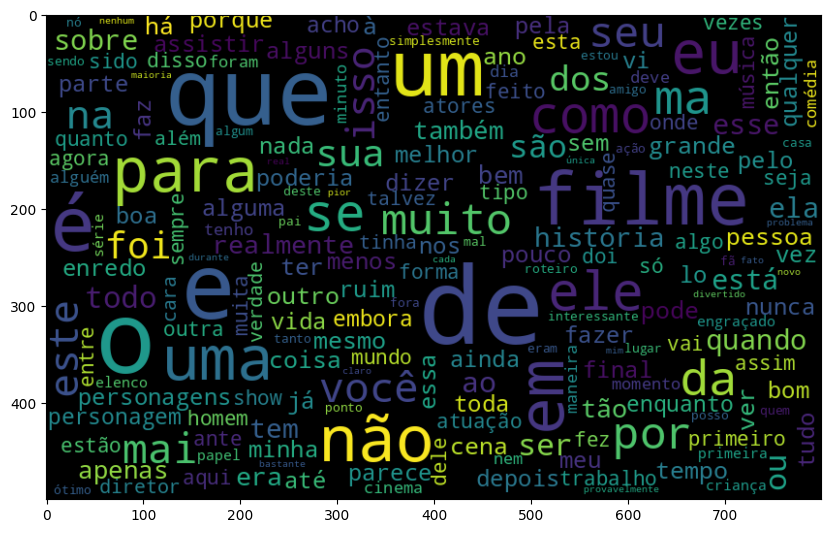

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,7))
plt.imshow(nuvem_palavras, interpolation='bilinear')
plt.axis = 'off'
plt.show()

In [23]:
resenha.query("sentiment == 'pos'")

,id,text_en,text_pt,sentiment,classificacao
12389,12391,I went and saw this movie last night after bei...,Eu fui e vi este filme ontem à noite depois de...,pos,1
12390,12392,Actor turned director Bill Paxton follows up h...,"O diretor do ator, Bill Paxton, segue sua prom...",pos,1
12391,12393,As a recreational golfer with some knowledge o...,Como um jogador de recreio com algum conhecime...,pos,1
12392,12394,"I saw this film in a sneak preview, and it is ...","Eu vi esse filme em uma prévia, e é delicioso....",pos,1
12393,12395,Bill Paxton has taken the true story of the 19...,Bill Paxton levou a verdadeira história do gol...,pos,1
...,...,...,...,...,...
49454,49456,"Seeing as the vote average was pretty low, and...","Como a média de votos era muito baixa, e o fat...",pos,1
49455,49457,"The plot had some wretched, unbelievable twist...",O enredo teve algumas reviravoltas infelizes e...,pos,1
49456,49458,I am amazed at how this movieand most others h...,Estou espantado com a forma como este filme e ...,pos,1
49457,49459,A Christmas Together actually came before my t...,A Christmas Together realmente veio antes do m...,pos,1


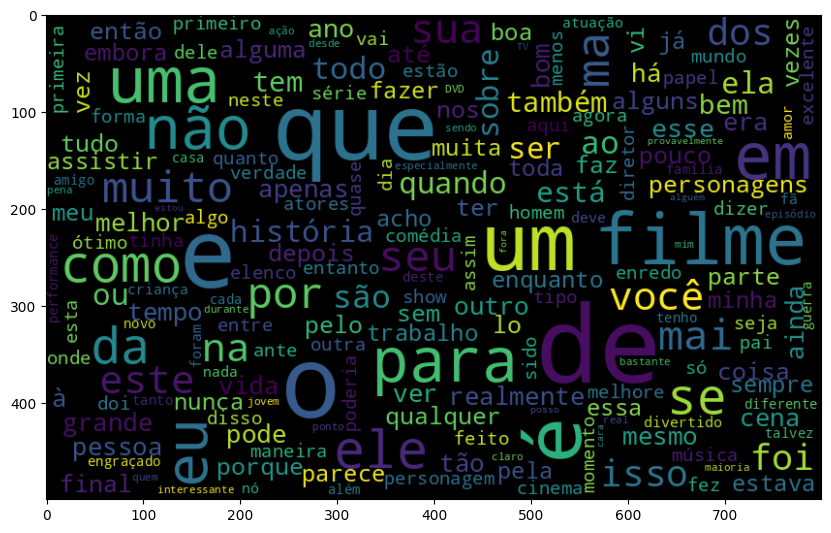

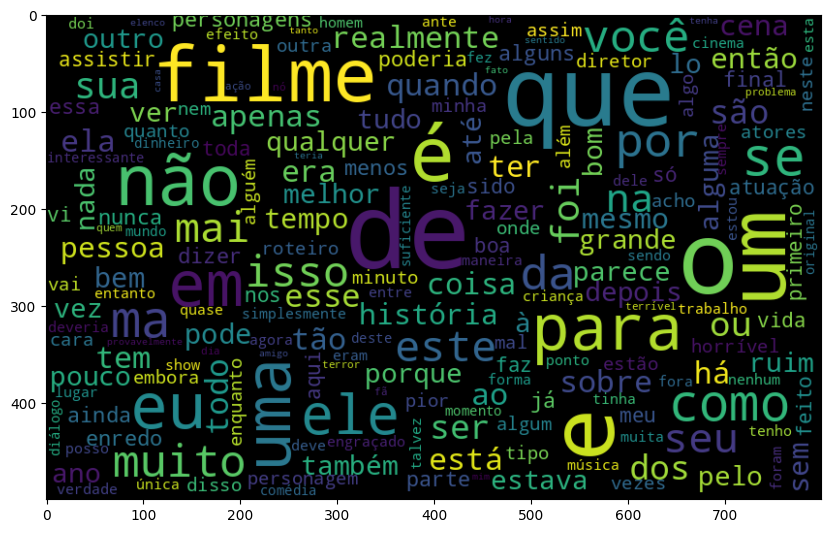

In [24]:
def nuvem_palavras(linhas, coluna_texto):
  todas_palavras = ' '.join([texto for texto in linhas[coluna_texto]])
  nuvem_palavras = WordCloud(width=800,height=500,max_font_size=110,collocations=False).generate(todas_palavras)

  plt.figure(figsize=(10,7))
  plt.imshow(nuvem_palavras, interpolation='bilinear')
  plt.axis = 'off'
  plt.show()

nuvem_palavras(resenha.query("sentiment == 'pos'"), 'text_pt')
nuvem_palavras(resenha.query("sentiment == 'neg'"), 'text_pt')

In [25]:
!pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [26]:
import nltk

nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   U

True

In [27]:
frases = ['um filme ruim', 'um filme bom']

frequencia = nltk.FreqDist(frases)
frequencia

FreqDist({'um filme ruim': 1, 'um filme bom': 1})

In [28]:
from nltk import tokenize

frase = 'Bem vindo ao mundo do PLN'

token_espaco = tokenize.WhitespaceTokenizer()
token_frase = token_espaco.tokenize(frase)

token_frase

['Bem', 'vindo', 'ao', 'mundo', 'do', 'PLN']

In [29]:
token_frase = token_espaco.tokenize(todas_palavras)
frequencia = nltk.FreqDist(token_frase)

In [30]:
frequencia

FreqDist({'de': 417651, 'que': 325070, 'e': 299743, 'o': 244881, 'um': 216410, 'a': 210179, 'é': 192381, 'em': 132778, 'uma': 130888, 'não': 127915, ...})

In [31]:
df_frequencia = pd.DataFrame({'Palavra':list(frequencia.keys()),'Frequencia':list(frequencia.values())})

In [32]:
df_frequencia.nlargest(columns='Frequencia', n=10)

,Palavra,Frequencia
20,de,417651
14,que,325070
42,e,299743
3,o,244881
7,um,216410
102,a,210179
45,é,192381
200,em,132778
1,uma,130888
29,não,127915


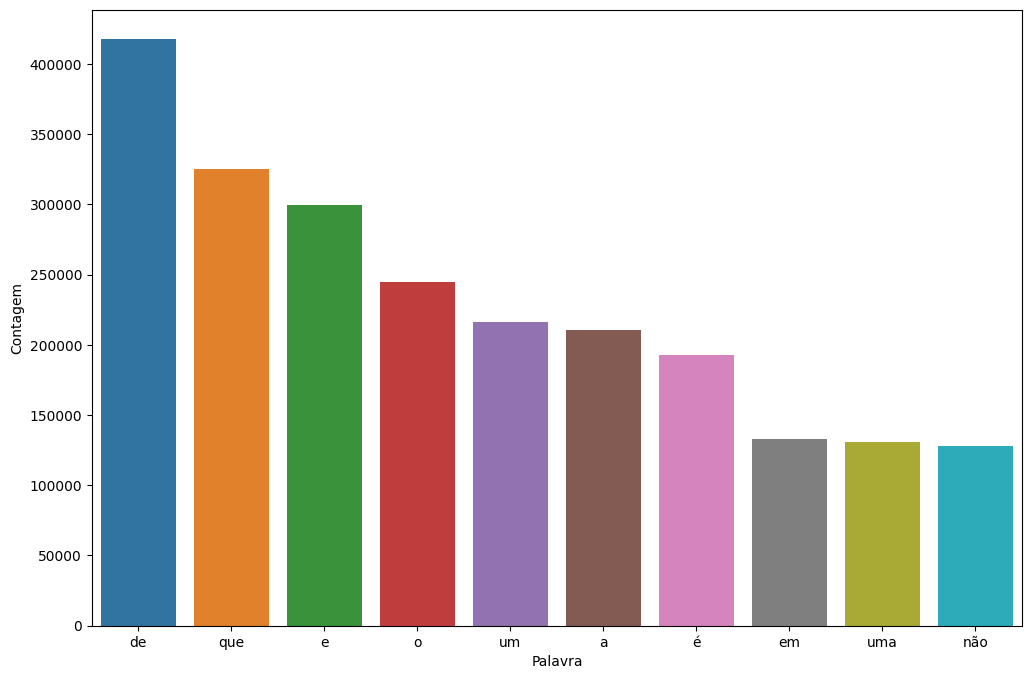

In [33]:
import seaborn as sns

plt.figure(figsize=(12,8))
ax = sns.barplot(data = df_frequencia.nlargest(columns='Frequencia', n=10), x = 'Palavra', y = 'Frequencia')
ax.set(ylabel='Contagem')
plt.show()

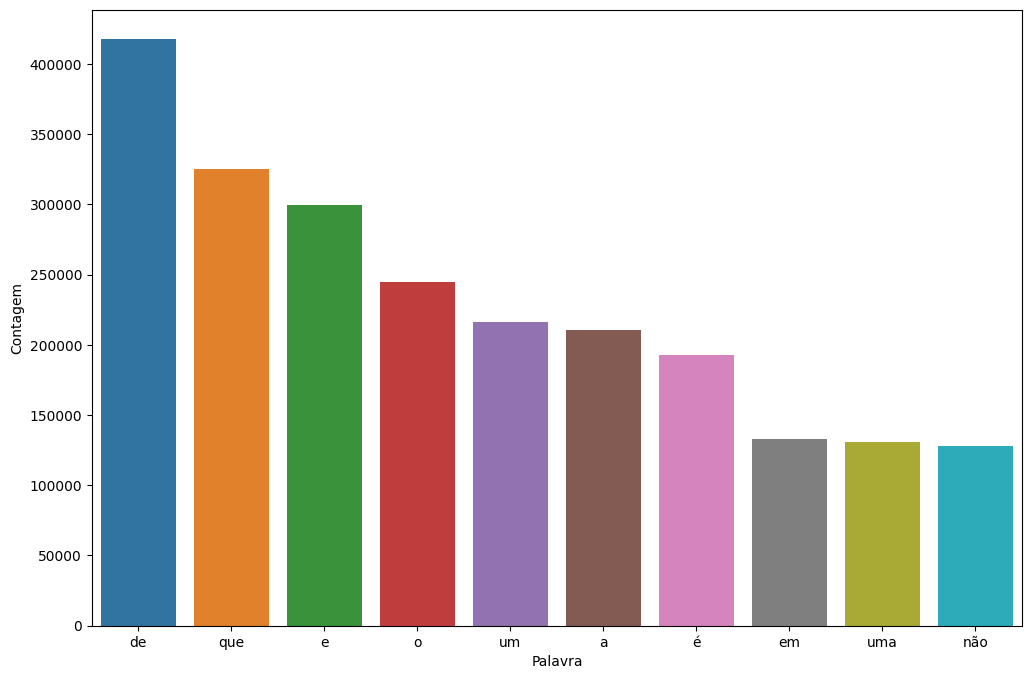

In [34]:
def pareto(texto, coluna, quantidade):
  todas_palavras = ' '.join([texto for texto in texto[coluna]])

  token_frase = token_espaco.tokenize(todas_palavras)
  frequencia = nltk.FreqDist(token_frase)
  df_frequencia = pd.DataFrame({'Palavra':list(frequencia.keys()),'Frequencia':list(frequencia.values())})
  df_frequencia = df_frequencia.nlargest(columns='Frequencia', n=quantidade)

  plt.figure(figsize=(12,8))
  ax = sns.barplot(data = df_frequencia, x = 'Palavra', y = 'Frequencia')
  ax.set(ylabel='Contagem')
  plt.show()

pareto(resenha, 'text_pt', 10)

In [35]:
palavras_irrelevantes = nltk.corpus.stopwords.words('portuguese')
frase_processada = list()

for opiniao in resenha.text_pt:
  nova_frase = list()
  palavras_texto = token_espaco.tokenize(opiniao)

  for palavra in palavras_texto:
    if palavra not in palavras_irrelevantes:
      nova_frase.append(palavra)

  frase_processada.append(' '.join(nova_frase))

resenha['tratamento_1'] = frase_processada

In [36]:
resenha.head()

,id,text_en,text_pt,sentiment,classificacao,tratamento_1
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0,"Mais vez, Sr. Costner arrumou filme tempo nece..."
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0,Este exemplo motivo maioria filmes ação mesmos...
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0,"Primeiro tudo odeio raps imbecis, poderiam agi..."
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0,Nem Beatles puderam escrever músicas todos gos...
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0,"Filmes fotos latão palavra apropriada eles, ve..."


In [37]:
classificar_texto(resenha, 'tratamento_1', 'classificacao')

0.6811160533764659

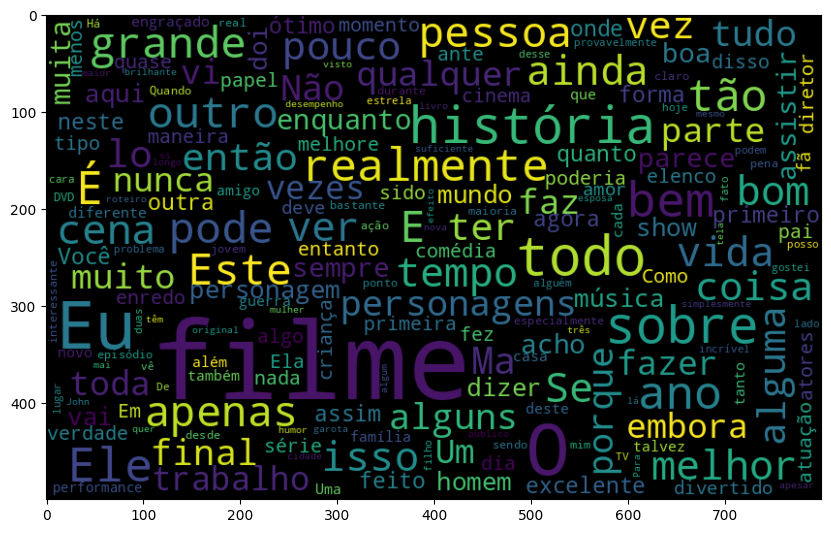

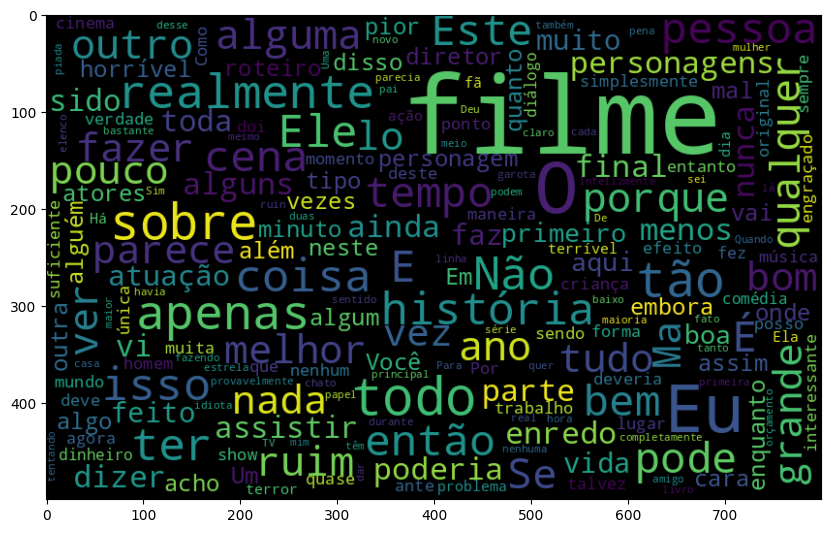

In [38]:
nuvem_palavras(resenha.query("sentiment == 'pos'"), 'tratamento_1')
nuvem_palavras(resenha.query("sentiment == 'neg'"), 'tratamento_1')

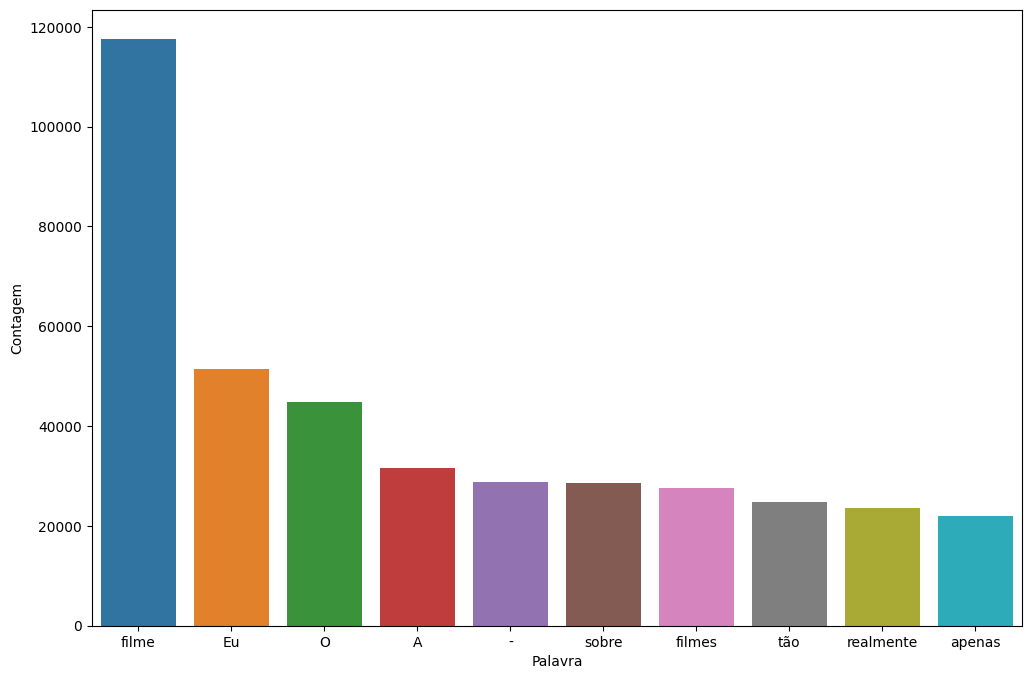

In [39]:
pareto(resenha, 'tratamento_1', 10)

In [45]:
from nltk import tokenize

frase = 'Olá mundo!'

token_pontuacao = tokenize.WordPunctTokenizer()

token_frase = token_pontuacao.tokenize(frase)

print(token_frase)

['Olá', 'mundo', '!']


In [47]:
from string import punctuation

In [48]:
punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [49]:
pontuacao = list()

for ponto in punctuation:
  pontuacao.append(ponto)

In [50]:
pontuacao

['!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 '{',
 '|',
 '}',
 '~']

In [51]:
pontuacao_stopwords = pontuacao + palavras_irrelevantes

In [52]:
frase_processada = list()

for opiniao in resenha['tratamento_1']:
  nova_frase = list()

  palavras_texto = token_pontuacao.tokenize(opiniao)

  for palavra in palavras_texto:
    if(palavra not in pontuacao_stopwords):
      nova_frase.append(palavra)
  
  frase_processada.append(' '.join(nova_frase))

resenha['tratamento_2'] = frase_processada

In [53]:
resenha.head()

,id,text_en,text_pt,sentiment,classificacao,tratamento_1,tratamento_2
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0,"Mais vez, Sr. Costner arrumou filme tempo nece...",Mais vez Sr Costner arrumou filme tempo necess...
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0,Este exemplo motivo maioria filmes ação mesmos...,Este exemplo motivo maioria filmes ação mesmos...
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0,"Primeiro tudo odeio raps imbecis, poderiam agi...",Primeiro tudo odeio raps imbecis poderiam agir...
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0,Nem Beatles puderam escrever músicas todos gos...,Nem Beatles puderam escrever músicas todos gos...
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0,"Filmes fotos latão palavra apropriada eles, ve...",Filmes fotos latão palavra apropriada verdade ...


In [54]:
resenha['tratamento_1'][0]

'Mais vez, Sr. Costner arrumou filme tempo necessário. Além terríveis seqüências resgate mar, quais poucas, simplesmente importei nenhum personagens. A maioria fantasmas armário, personagem Costers realizado logo início, esquecido tarde, importava. O personagem deveríamos importar arrogante superconfiante, Ashton Kutcher. O problema sai garoto pensa melhor qualquer outra pessoa redor mostra sinais armário desordenado. Seu único obstáculo parece vencendo Costner. Finalmente, bem além meio caminho, Costner conta sobre fantasmas Kutchers. Somos informados Kutcher levado melhor pressentimentos presságios anteriores. Nenhuma mágica aqui, tudo podia fazer desligar hora.'

In [55]:
resenha['tratamento_2'][0]

'Mais vez Sr Costner arrumou filme tempo necessário Além terríveis seqüências resgate mar quais poucas simplesmente importei nenhum personagens A maioria fantasmas armário personagem Costers realizado logo início esquecido tarde importava O personagem deveríamos importar arrogante superconfiante Ashton Kutcher O problema sai garoto pensa melhor qualquer outra pessoa redor mostra sinais armário desordenado Seu único obstáculo parece vencendo Costner Finalmente bem além meio caminho Costner conta sobre fantasmas Kutchers Somos informados Kutcher levado melhor pressentimentos presságios anteriores Nenhuma mágica aqui tudo podia fazer desligar hora'

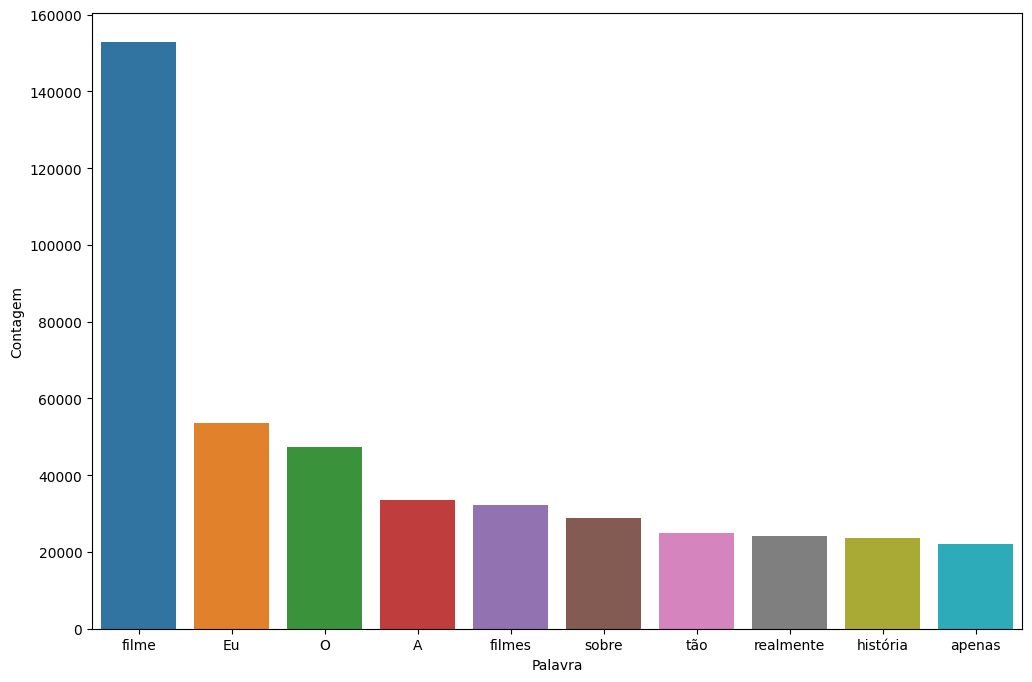

In [56]:
pareto(resenha, 'tratamento_2', 10)